# @GRIP : The Sparks Foundation


## Author : Ounadi Ikram

## Computer Vision and Internet of things


## Task-1 : Object Detection / Optical Character Recognition (OCR)


## Object Detection

Implement an object detector which identifies the classes of the objects in an image or video. I used the mobilenet for detection


In [1]:
from imutils import perspective
from skimage.filters import threshold_local
import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.pyplot import figure


In [2]:
config_file= 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [148]:
!pip install --upgrade opencv-python

In [4]:
classLabels=[]
file_name = 'coco.names'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(len(classLabels))
print(classLabels)

91
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [6]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

<dnn_Model 0x7f844b5a6cb0>

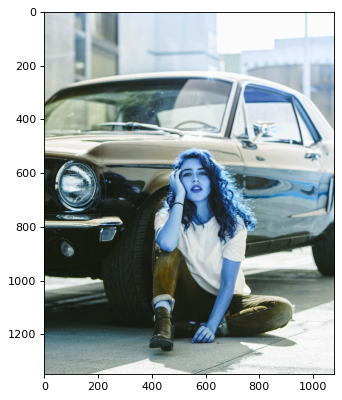

In [7]:
img = cv2.imread('od.jpeg')
figure(figsize=(8, 6), dpi=80)

plt.imshow(img)


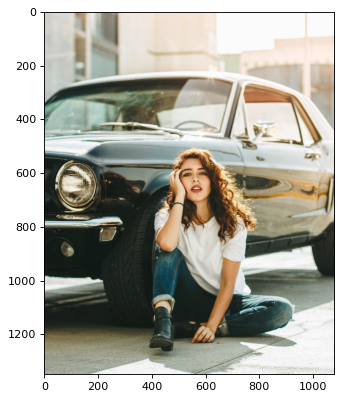

In [8]:
figure(figsize=(8, 6), dpi=80)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


In [9]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [10]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),  confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness=3)

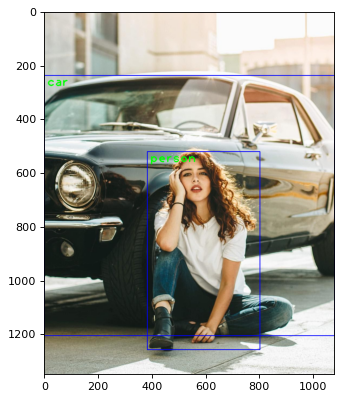

In [11]:
figure(figsize=(8, 6), dpi=80)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


## Optical Character Recognition (OCR)


In [12]:
pip install keras_ocr


Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [14]:
import keras_ocr as kr
pipeline=kr.pipeline.Pipeline()


Looking for /Users/ounadiikram/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/ounadiikram/.keras-ocr/crnn_kurapan.h5


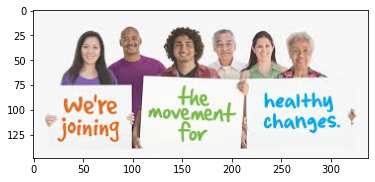

In [15]:
img = kr.tools.read('ocr1.jpeg')
plt.imshow(img)


In [16]:
prediction_groups=pipeline.recognize([img])

<AxesSubplot:>

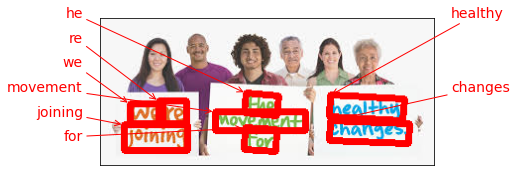

In [17]:
#print image with annotation and boxes
kr.tools.drawAnnotations(image=img, predictions=prediction_groups[0])

In [18]:
import pytesseract
from PIL import Image

In [19]:
import os
def get_string(img_path):
    # Read image using opencv
    img = cv2.imread(img_path)
   # Extract the file name without the file extension
    file_name = os.path.basename(img_path).split('.')[0]
    file_name = file_name.split()[0]
    # Create a directory for outputs
    output_path = os.path.join('output_path', "ocr")
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    # Rescale the image, if needed.
    img = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
    # Converting to gray scale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #Removing Shadows
    rgb_planes = cv2.split(img)
    result_planes = []
    result_norm_planes = []
    for plane in rgb_planes:
        dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
        bg_img = cv2.medianBlur(dilated_img, 21)
        diff_img = 255 - cv2.absdiff(plane, bg_img)
        result_planes.append(diff_img)
    img = cv2.merge(result_planes)
    
    #Apply dilation and erosion to remove some noise
    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)#increases the white region in the image 
    img = cv2.erode(img, kernel, iterations=1) #erodes away the boundaries of foreground object
    
    #Apply blur to smooth out the edges
    #img = cv2.GaussianBlur(img, (5, 5), 0)
    
    # Apply threshold to get image with only b&w (binarization)
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    
    #Save the filtered image in the output directory
    save_path = os.path.join(output_path, file_name + "_filter_" + str('as') + ".png")
    cv2.imwrite(save_path, img)
    
    

    # Recognize text with tesseract for python
    result = pytesseract.image_to_string(img, lang="eng")
    return result

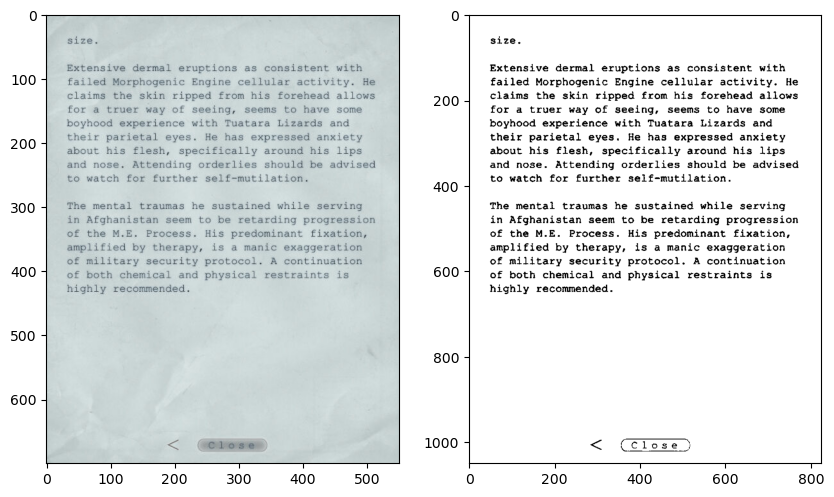

In [23]:
s = get_string("ocr.jpeg")
img1 = cv2.imread('ocr.jpeg')
figure(figsize=(10, 20), dpi=100)

plt.subplot(2, 2, 1)
plt.imshow(img1)
img2 = cv2.imread('/Users/ounadiikram/Documents/task 1/output_path/ocr/ocr_filter_as.png')

plt.subplot(2, 2, 2)
plt.imshow(img2)

In [178]:
print(s)

size.

Extensive dermal eruptions as consistent with
failed Morphogenic Engine cellular activity. He
claims the skin ripped from his forehead allows
for a truer way of seeing, seems to have some
boyhood experience with Tuatara Lizards and
their parietal eyes. He has expressed anxiety
about his flesh, specifically around his lips
and nose. Attending orderlies should be advised
to watch for further self-mutilation.

The mental traumas he sustained while serving
in Afghanistan seem to be retarding progression
of the M.E. Process. His predominant fixation,
amplified by therapy, is a manic exaggeration
of military security protocol. A continuation
of both chemical and physical restraints is
highly recommended.

< CClose

